<h1 style="font-size:3rem;color:maroon;"> Predicting Air Pollution Level using Machine Learning</h1>

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting air pollution level in an area in Eindhoven in the upcoming week.

We're going to take the following approach:
1. Problem definition
2. Data
3. Features
4. Data Exploration & Visualization
5. Data Preparation
6. Modelling

<h2><font color=slateblue> 1. Problem Definition </font></h2>

In a statement,
> Given historical pollution data, weather data and people going through an area, can we predict air pollution level in an area in Eindhoven in the upcoming week?

<h2><font color=slateblue> 2. Data </font></h2>

The data is provided by TNO and Zicht op Data.

<h2><font color=slateblue> 3. Features </font></h2>

This is where you'll get different information about each of the features in our data.

We have three separate datasets for the period between 25-09-2021 and 30-12-2021:

**Air pollution**
* date: date in ymd_hms
* PC4: postcode
* pm2.5: particulate matter <2.5um in ug/m3
* pm10: particulate matter <10um in ug/m3
* no2: nitrogen dioxide in ug/m3
* no: nitrogen oxide in ug/m3
* so2: sulphur dioxide in ug/m3


**Meteo**
* date: date in ymd_hms
* PC4: postcode
* wd: wind direction in degrees 0-360
* ws: wind speed in m/s
* blh: boundary layer height in metres
* tcc: total cloud cover in oktas (0-9)
* ssrd: solar surface radiation downwards in W/m2 

(see https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview for more information)

**Zichtop**
* PC4: postcode
* date: date in ymd_hms
* pop_tot: total number of people in PC4 for each time step
* m00_30: number of people who have been there for up to 30 minutes
* m30_60: number of people who have been there for 30 and 60 minutes
* H1_2: number of people who have been there for 1 and 2 hours
* H2_4: number of people who have been there for 2 and 4 hours
* H4_8: number of people who have been there for 4 and 8 hours
* H8_16: number of people who have been there for 8 and 16 hours
* H16plus: number of people who have been there for over 16 hours

<h2><font color=slateblue> 4. Data Exploration & Visualization </font></h2>

<h3><font color=steelblue>Meteo dataset</font><h3>

<h4><font color=mediumvioletred>Read CSV files and get meteo data sample</font></h4>

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_meteo = pd.read_csv("data/meteo.csv")
df_air_pollution = pd.read_csv("data/air_pollution.csv")
df_meteo.sample(10)

,date,PC4,wd,ws,blh,tcc,ssrd
46808,2021-05-06 08:00:00,5616,212.181351,3.060509,720.367798,0.980718,346.195243
73241,2021-05-12 17:00:00,5622,168.310165,1.028075,448.963623,0.534280,209.020208
55291,2021-04-24 19:00:00,5617,61.099125,4.428370,743.446594,0.786707,19.684078
165572,2021-11-25 20:00:00,5633,193.084900,2.586384,102.310219,0.981005,0.000000
47597,2021-06-08 05:00:00,5616,19.830463,2.249244,107.497543,0.114462,78.687925
138602,2021-10-28 02:00:00,5629,265.842041,3.401980,219.591492,0.069614,0.000000
53831,2021-02-22 23:00:00,5617,252.356400,3.375351,231.403290,0.370273,0.000000
251259,2021-09-07 03:00:00,5654,351.808350,1.220289,38.950592,0.980806,0.000000
271645,2021-01-04 13:00:00,5657,46.482868,5.126524,824.160583,0.995898,81.071276
102251,2021-09-03 11:00:00,5625,33.956455,3.122911,638.130005,0.000000,651.578958


<h4><font color=mediumvioletred>Get air pollution data sample</font></h4>

In [116]:
df_air_pollution.sample(10)

,date,PC4,pm10,pm2.5,no2,no,so2
56726,2021-12-05 13:00:00,5642,15.143165,23.478901,14.278735,2.586056,1.160788
52043,2021-10-19 11:00:00,5658,11.926496,6.643806,18.658387,12.207349,5.012210
29320,2021-10-10 16:00:00,5633,37.149723,20.406223,34.469164,22.551634,4.210573
52962,2021-11-26 18:00:00,5658,9.904974,7.245156,24.933150,16.312646,3.792593
24899,2021-10-27 11:00:00,5629,13.563765,6.666611,19.676800,12.873651,1.825217
10993,2021-11-20 01:00:00,5617,18.526340,13.858179,59.734417,39.081560,7.685547
43825,2021-10-12 01:00:00,5653,14.620469,9.646616,27.794641,18.184792,3.231296
26016,2021-10-07 00:00:00,5631,26.511051,16.436764,29.147493,19.069902,4.372049
55223,2021-12-03 22:00:00,5645,8.849568,16.905436,11.104170,0.051567,1.089410
64960,2021-12-16 15:00:00,5611,34.327110,41.261930,39.306420,14.133032,3.787135


<h4><font color=mediumvioletred>Show all postal codes</font></h4>

In [117]:
df_meteo['PC4'].unique()

array([5611, 5612, 5613, 5614, 5615, 5616, 5617, 5621, 5622, 5623, 5624,
       5625, 5626, 5627, 5628, 5629, 5631, 5632, 5633, 5641, 5642, 5643,
       5644, 5645, 5646, 5651, 5652, 5653, 5654, 5655, 5656, 5657, 5658])

<h4><font color=mediumvioletred>Show the shape of the meteo data</font></h4>

In [118]:
df_meteo.shape

(289080, 7)

<h4><font color=mediumvioletred>Show all datatypes of meteo data</font></h4>

In [119]:
df_meteo['date'] = pd.to_datetime(df_meteo['date'])
df_air_pollution['date'] = pd.to_datetime(df_air_pollution['date'])
df_meteo.dtypes

date    datetime64[ns]
PC4              int64
wd             float64
ws             float64
blh            float64
tcc            float64
ssrd           float64
dtype: object

<h4><font color=mediumvioletred>Show standard distribution of boundary layer height data</font></h4>

Skewness per column:
PC4     0.133640
wd     -0.214002
ws      0.931107
blh     1.054221
tcc    -0.894305
ssrd    1.656176
dtype: float64


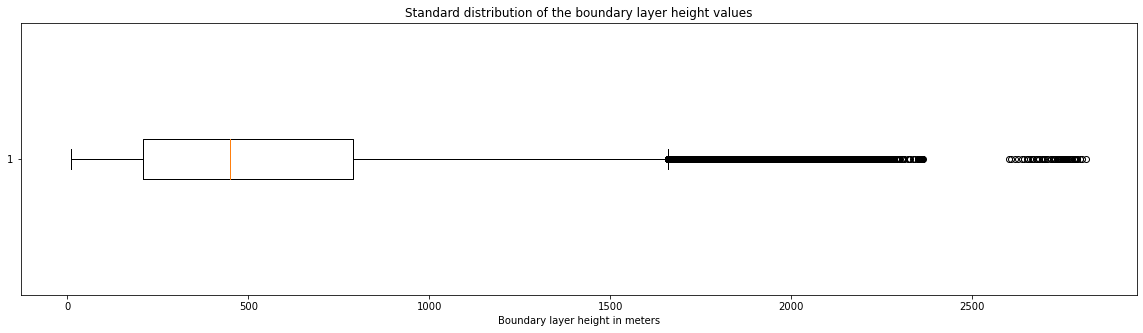

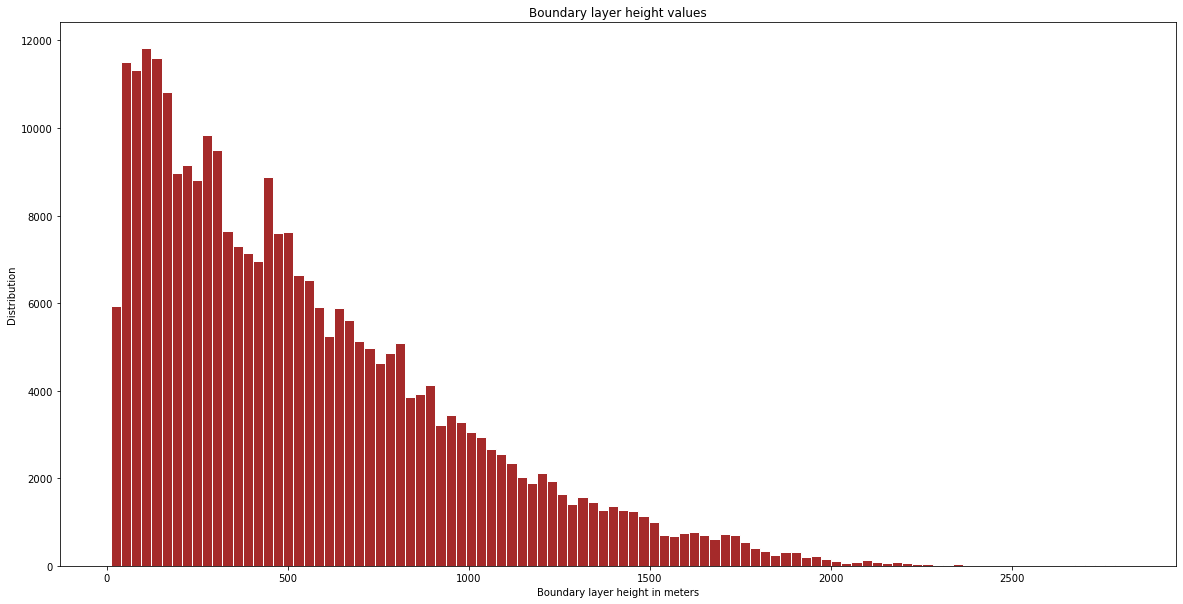

In [120]:
print("Skewness per column:")
print(df_meteo.skew(numeric_only=True))

plt.figure(figsize=(20,5))
plt.boxplot(df_meteo['blh'], vert=False)
plt.title("Standard distribution of the boundary layer height values")
plt.xlabel("Boundary layer height in meters")
plt.show()

plt.figure(figsize=(20,10))
plt.hist(df_meteo['blh'], edgecolor='white', color='brown', bins=100)
plt.title("Boundary layer height values")
plt.xlabel("Boundary layer height in meters")
plt.ylabel("Distribution")
plt.show()

<h4><font color=mediumvioletred>Filter meteo data on single postal code and get a sample</font></h4>

In [121]:
postalcode_df_meteo = df_meteo[df_meteo['PC4'] == 5611]
postalcode_df_meteo.sample(10)

,date,PC4,wd,ws,blh,tcc,ssrd
5190,2021-08-05 06:00:00,5611,279.537476,0.156346,28.453054,0.141804,98.377769
4051,2021-06-18 19:00:00,5611,210.854492,2.649495,679.836060,0.329423,69.083416
6875,2021-10-14 11:00:00,5611,197.593216,5.910963,811.763672,0.856688,201.671181
3099,2021-05-10 03:00:00,5611,282.790100,5.851960,808.363953,0.996644,0.000000
4328,2021-06-30 08:00:00,5611,119.029724,3.082170,442.673065,1.000000,54.721541
780,2021-02-02 12:00:00,5611,285.451996,2.318806,278.885925,1.000000,48.848711
1261,2021-02-22 13:00:00,5611,251.558075,4.166262,735.981750,0.832544,382.520000
8409,2021-12-17 09:00:00,5611,64.079475,1.743395,163.040543,1.000000,13.679715
8227,2021-12-09 19:00:00,5611,251.162476,3.999039,440.350769,0.688638,0.000000
4395,2021-07-03 03:00:00,5611,323.722015,1.986299,69.018768,0.674117,0.000000


<h4><font color=mediumvioletred>Visualize windspeed compared to solar surface radiation downwards</font></h4>

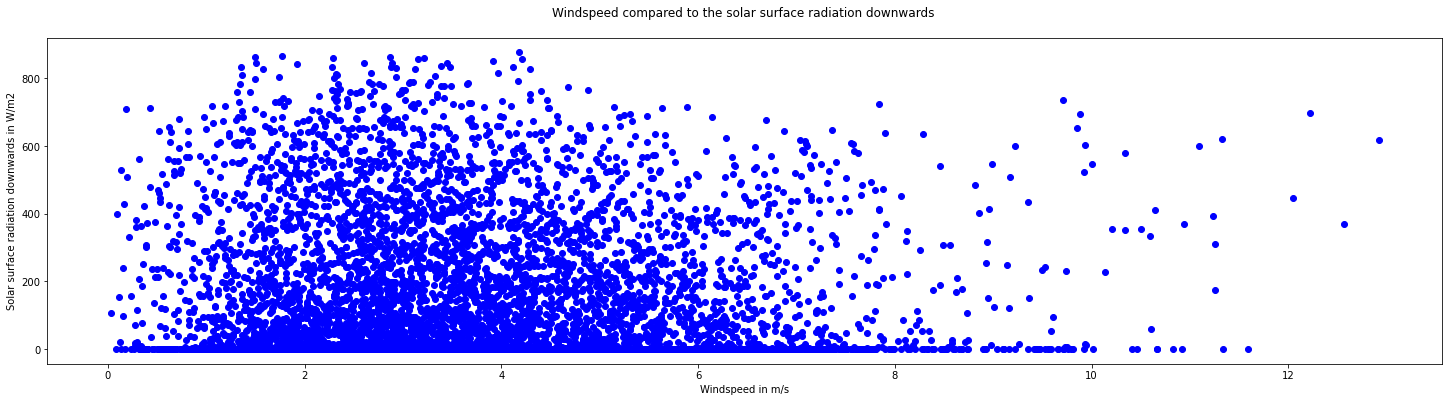

In [122]:
fig, ax = plt.subplots(figsize=(25, 6))
scatter = ax.scatter((postalcode_df_meteo["ws"]),
                list(postalcode_df_meteo["ssrd"]),
                color="blue")

ax.set(title="Windspeed compared to the solar surface radiation downwards \n",
      xlabel="Windspeed in m/s",
      ylabel="Solar surface radiation downwards in W/m2");

<h4><font color=mediumvioletred>Visualize windspeed in a single day from a specific postal code</font></h4>

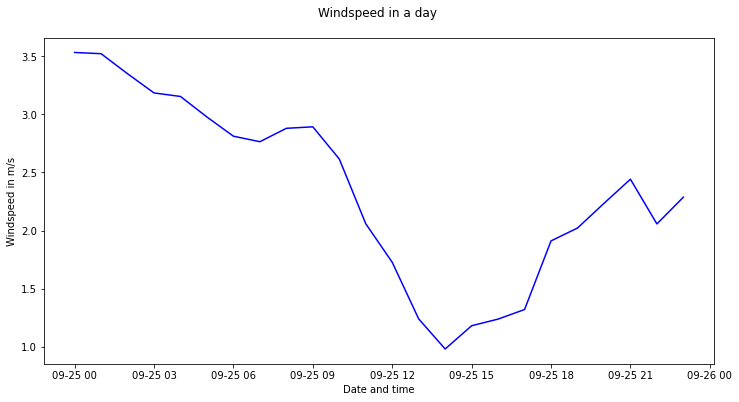

In [123]:
one_day = postalcode_df_meteo[postalcode_df_meteo['date']. dt. strftime('%Y-%m-%d')=='2021-09-25']

fig, ax = plt.subplots(figsize=(12, 6))
plot = ax.plot(list(one_day["date"]),
                list(one_day["ws"]),
                color="blue")

ax.set(title="Windspeed in a day \n",
      xlabel="Date and time",
      ylabel="Windspeed in m/s");


<h4><font color=mediumvioletred>Merge meteo and air pollution dataset and show sample</font></h4>

In [124]:
df_meteo_air_pollution = pd.merge(df_meteo, df_air_pollution[['PC4','date', 'pm10', 'pm2.5', 'no2',	'no', 'so2']], on=['PC4', 'date'])
df_meteo_air_pollution.sample(10)

,date,PC4,wd,ws,blh,tcc,ssrd,pm10,pm2.5,no2,no,so2
11910,2021-10-06 06:00:00,5616,231.719589,7.463819,984.865540,0.998814,0.109375,5.555810,3.719020,10.373368,6.786831,1.228605
43636,2021-12-06 03:00:00,5633,76.722595,2.051291,49.938686,0.636791,0.000000,28.601015,50.395561,26.105941,16.424777,1.775241
46390,2021-12-23 21:00:00,5641,221.283203,6.158351,535.761597,1.000000,0.000000,25.495330,49.502530,24.611823,0.387607,2.293023
66887,2021-12-04 22:00:00,5654,228.156937,4.927902,439.419800,0.923668,0.000000,14.018852,20.362778,17.317814,0.079179,3.597568
37706,2021-10-14 02:00:00,5631,209.463043,3.856271,298.673187,0.967899,0.000000,9.877192,7.234859,16.433668,10.751815,5.279274
45831,2021-11-30 15:00:00,5641,174.152756,6.610399,861.110291,1.000000,6.749426,5.502787,4.499235,22.536007,14.744303,1.020127
19899,2021-11-17 03:00:00,5622,235.415527,3.388723,271.804810,0.778807,0.000000,21.696812,18.015993,51.434166,33.651076,4.984011
21849,2021-11-01 09:00:00,5623,246.818939,6.229906,995.159180,0.023125,187.133819,11.663565,5.471729,14.662884,9.593270,2.588994
44523,2021-10-07 03:00:00,5641,170.913818,1.734940,74.196518,0.452396,0.000000,20.376648,13.866083,20.409999,13.353350,3.874133
43410,2021-11-26 18:00:00,5633,240.758362,6.144690,626.100586,0.999109,0.000000,11.374464,7.150613,34.082236,22.298484,3.554521


<h4><font color=mediumvioletred>Show corrolation between merged meteo and air pollution data</font></h4>

In [125]:
df_meteo_air_pollution.corr(method='spearman')

,PC4,wd,ws,blh,tcc,ssrd,pm10,pm2.5,no2,no,so2
PC4,1.000000,-0.000203,-0.001175,-0.000395,-0.000085,0.000106,-0.026865,-0.028674,-0.034462,-0.027125,0.004346
wd,-0.000203,1.000000,0.190082,0.048322,0.050032,0.032333,-0.148475,-0.106274,-0.161741,-0.109364,-0.008121
ws,-0.001175,0.190082,1.000000,0.807271,0.176822,0.073962,-0.607904,-0.472557,-0.591700,-0.499212,-0.212465
blh,-0.000395,0.048322,0.807271,1.000000,0.200182,0.341155,-0.615602,-0.542800,-0.655762,-0.502562,-0.337730
tcc,-0.000085,0.050032,0.176822,0.200182,1.000000,0.001251,-0.031441,0.110042,-0.105527,-0.186421,-0.208994
ssrd,0.000106,0.032333,0.073962,0.341155,0.001251,1.000000,-0.059004,-0.158170,-0.206825,-0.049303,-0.076840
pm10,-0.026865,-0.148475,-0.607904,-0.615602,-0.031441,-0.059004,1.000000,0.886844,0.560476,0.283385,0.336788
pm2.5,-0.028674,-0.106274,-0.472557,-0.542800,0.110042,-0.158170,0.886844,1.000000,0.431592,0.014917,0.189855
no2,-0.034462,-0.161741,-0.591700,-0.655762,-0.105527,-0.206825,0.560476,0.431592,1.000000,0.735620,0.394545
no,-0.027125,-0.109364,-0.499212,-0.502562,-0.186421,-0.049303,0.283385,0.014917,0.735620,1.000000,0.371746


<h4><font color=mediumvioletred>Show corrolation between particulate matter smaller than 2.5 um and windspeed</font></h4>

-0.4220468437258586


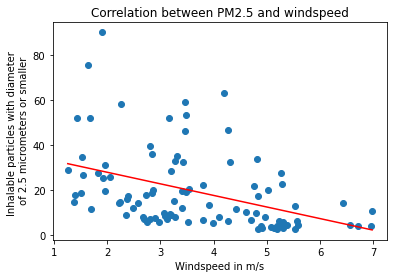

In [126]:
group_by_day = df_meteo_air_pollution.groupby(pd.Grouper(freq='D', key='date')).mean()
ws_pm25_corr = group_by_day["ws"].corr(group_by_day["pm2.5"])
print(ws_pm25_corr)
plt.scatter(group_by_day["ws"], group_by_day["pm2.5"])
plt.plot(np.unique(group_by_day["ws"]), np.poly1d(np.polyfit(group_by_day["ws"], group_by_day["pm2.5"], 1))
         (np.unique(group_by_day["ws"])), color='red')
plt.title('Correlation between PM2.5 and windspeed')
plt.xlabel('Windspeed in m/s')
plt.ylabel('Inhalable particles with diameter \n of 2.5 micrometers or smaller');
# Particulate matter <2.5um in ug/m3

<h4><font color=mediumvioletred>Show corrolation between particulate matter smaller than 2.5 um and boundary layer height</font></h4>

-0.5270951619288825


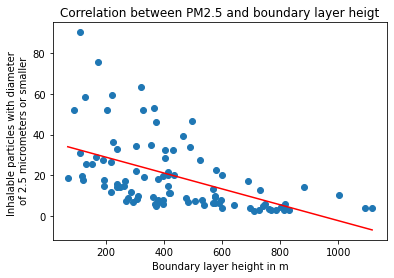

In [127]:
group_by_day = df_meteo_air_pollution.groupby(pd.Grouper(freq='D', key='date')).mean()
ws_pm25_corr = group_by_day["blh"].corr(group_by_day["pm2.5"])
print(ws_pm25_corr)
plt.scatter(group_by_day["blh"], group_by_day["pm2.5"])
plt.plot(np.unique(group_by_day["blh"]), np.poly1d(np.polyfit(group_by_day["blh"], group_by_day["pm2.5"], 1))
         (np.unique(group_by_day["blh"])), color='red')
plt.title('Correlation between PM2.5 and boundary layer heigt')
plt.xlabel('Boundary layer height in m')
plt.ylabel('Inhalable particles with diameter \n of 2.5 micrometers or smaller');
# Particulate matter <2.5um in ug/m3

<h4><font color=mediumvioletred>Show corrolation between particulate matter smaller than 2.5 um and solar surface radiation downwards</font></h4>

-0.44465439902953424


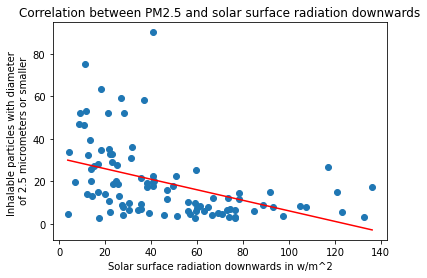

In [128]:
group_by_day = df_meteo_air_pollution.groupby(pd.Grouper(freq='D', key='date')).mean()
ws_pm25_corr = group_by_day["ssrd"].corr(group_by_day["pm2.5"])
print(ws_pm25_corr)
plt.scatter(group_by_day["ssrd"], group_by_day["pm2.5"])
plt.plot(np.unique(group_by_day["ssrd"]), np.poly1d(np.polyfit(group_by_day["ssrd"], group_by_day["pm2.5"], 1))
         (np.unique(group_by_day["ssrd"])), color='red')
plt.title('Correlation between PM2.5 and solar surface radiation downwards')
plt.xlabel('Solar surface radiation downwards in w/m^2')
plt.ylabel('Inhalable particles with diameter \n of 2.5 micrometers or smaller');
# Particulate matter <2.5um in ug/m3

<h4><font color=mediumvioletred> Visualize the boundary layer height for a week of postal code 5611</font></h4>

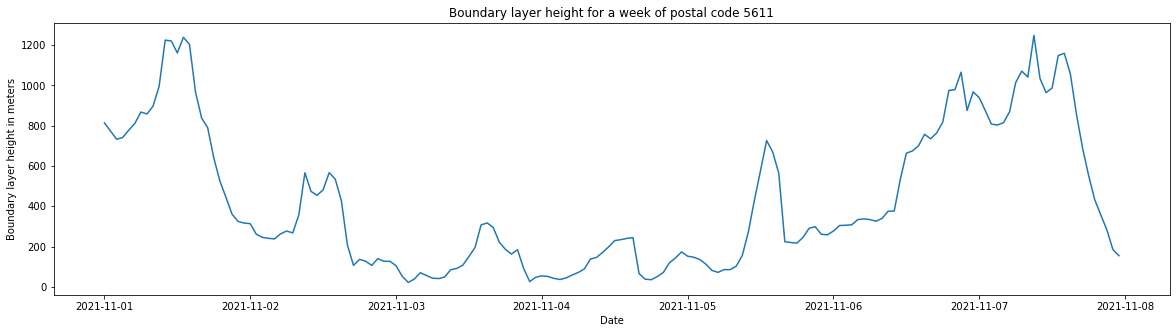

In [129]:
# Combined meto and air polution data for postalcode 5611
postalcode_df_meteo_air_polution = df_meteo_air_pollution[df_meteo_air_pollution['PC4'] == 5611]

# Combined data for the first week of november 2021 from postal code 5611 (24 * 7 = 168 entries)
one_week_postalcode_df_meteo_air_polution = postalcode_df_meteo_air_polution[postalcode_df_meteo_air_polution['date']. dt. strftime('%Y-%m')=='2021-11'].head(168)
    
# Scatter plot with day against tip
plt.figure(figsize = (20 ,5))

plt.plot(one_week_postalcode_df_meteo_air_polution['date'], one_week_postalcode_df_meteo_air_polution['blh'])
 
# Adding Title to the Plot
plt.title('Boundary layer height for a week of postal code 5611')

# Setting the X and Y labels
plt.xlabel('Date')
plt.ylabel('Boundary layer height in meters')
  
plt.show()

<h4><font color=mediumvioletred> Visualize particulate matter smaller than 2.5 micrometers for a week of postal code 5611</font></h4>

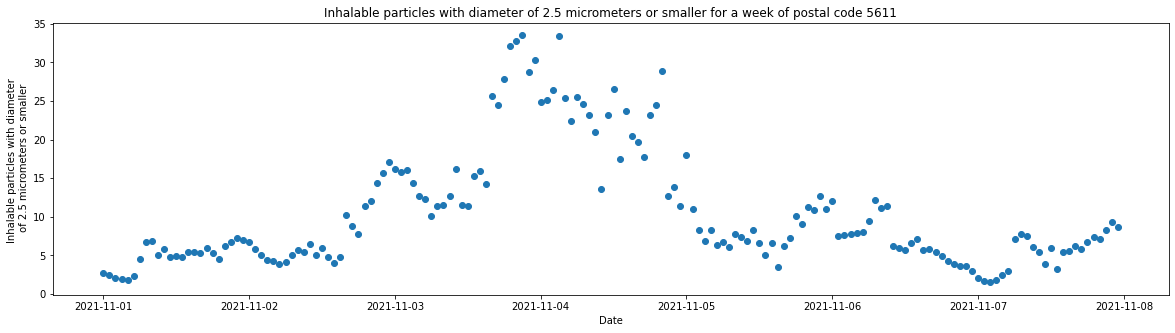

In [130]:
# Scatter plot with day against tip
plt.figure(figsize = (20 ,5))

plt.scatter(one_week_postalcode_df_meteo_air_polution['date'], one_week_postalcode_df_meteo_air_polution['pm2.5'])
 
# Adding Title to the Plot
plt.title('Inhalable particles with diameter of 2.5 micrometers or smaller for a week of postal code 5611')

# Setting the X and Y labels
plt.xlabel('Date')
plt.ylabel('Inhalable particles with diameter \n of 2.5 micrometers or smaller')
  
plt.show()

<h2><font color=slateblue> 5. Data Preparation </font></h2>

<h2><font color=slateblue> 6. Modelling </font></h2>